# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?

The more complex model that I built in question 5 which involved taking the arcsinh of 'Price' seems to be better than previous iterations of the model because the R-squared value of 0.5409 is greater than the previous R-squared value when I did not perform any transformations on thre data. I learned about the importance of transforming variables since previously it appears that the Price variable was not quite compatible with linear regression. Thus, having transformations in the data can help mitigate the effects that outliers or an uneven distirbution can have on a model overall.

7. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.



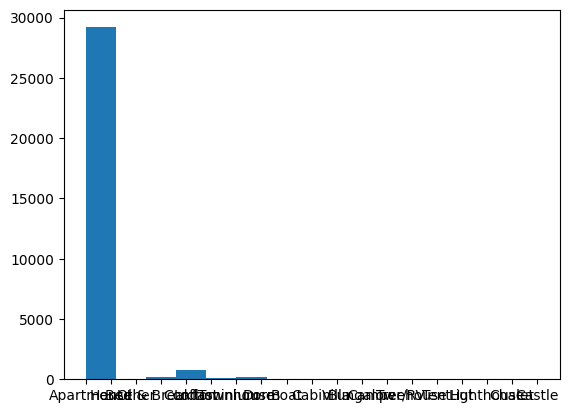

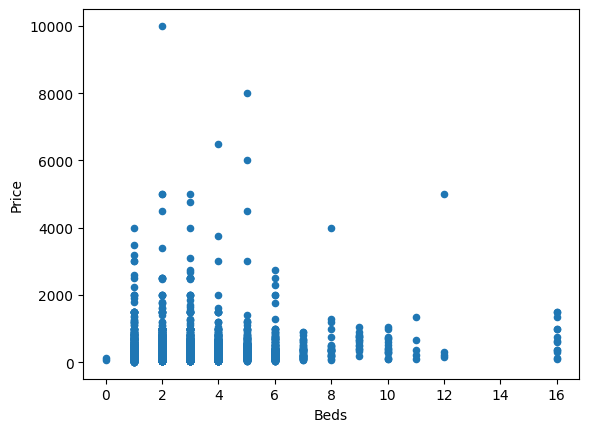

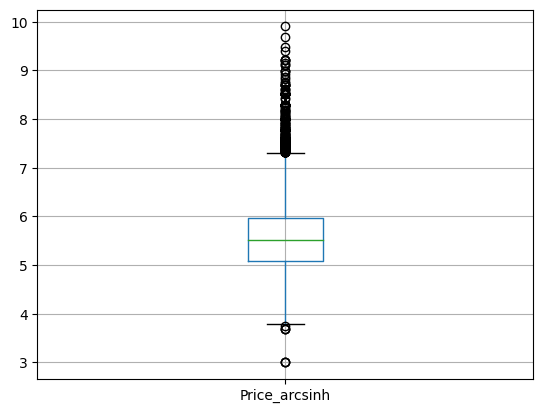

  Neighbourhood  Property Type        Room Type  Zipcode  Beds  Price  \
4      Manhattan     Apartment     Private room  10036.0   3.0    549   
5       Brooklyn     Apartment  Entire home/apt  11222.0   1.0    149   
6      Manhattan     Apartment  Entire home/apt  10004.0   1.0    250   
7       Brooklyn     Apartment     Private room  11201.0   1.0     90   
8      Manhattan     Apartment  Entire home/apt  10009.0   2.0    270   

   Review Scores Rating  Price_arcsinh  
4                  96.0       7.001246  
5                 100.0       5.697105  
6                 100.0       6.214612  
7                  94.0       5.192988  
8                  90.0       6.291573  
             var        coef
0          Bronx   75.195349
1       Brooklyn  127.773482
2      Manhattan  183.555375
3         Queens   96.813452
4  Staten Island  147.691489
-------
Rsq:  0.08420556178852046
RMSE:  108.12766265930243
               variable  coefficient
0  Review Scores Rating     1.069809
1      

<ipython-input-2-7b24a69ef468>:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = np.arcsinh(df['Price'])


In [2]:
import numpy as np  # Import NumPy
import pandas as pd  # Import Pandas
import seaborn as sns # Import Seaborn
import matplotlib.pyplot as plt

df = pd.read_csv('/home/airbnb_hw (1).csv') # Load the pretrial data
df.head()

price = df['Price']
# price.unique() # there are commas in the prices
price = price.str.replace(',','') # replace commas w/ empty str
price = pd.to_numeric(price,errors='coerce') # Typecast price to float/numeric
# print( price.unique() , '\n')
# print( 'Total missing: ', sum( price.isnull() ) )

# assign price back to the dataframe to update w/ clean vals
df['Price'] = price
df.drop(columns=['Review Scores Rating (bin)'], inplace=True) # dropped bin review scores
df.head()
#reviews = df['Review Scores Rating']

# drop host id, host since, name, number of records, number of reviews
df.drop(columns=['Host Id', 'Host Since', 'Name', 'Number of Records', 'Number Of Reviews'], inplace=True)
df.head(50)


# EDA
df['Property Type'].hist(bins=15,grid=False)
df.plot.scatter(y='Price', x='Beds' )
plt.show()
df['Price_arcsinh'] = np.arcsinh(df['Price'])
df.boxplot(column = 'Price_arcsinh')
plt.show()

df = df.dropna()
print(df.head())

# train test split
from sklearn.model_selection import train_test_split
y = df["Price"] # target var
X = df.drop('Price',axis=1) # feature vars

X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=100) # For replication purposes

# simple linear models
from sklearn import linear_model
y = df['Price']
X = pd.get_dummies(df['Neighbourhood '], dtype='int')
reg = linear_model.LinearRegression(fit_intercept=False).fit(X,y) # Run regression

results = pd.DataFrame({'var':reg.feature_names_in_, 'coef': reg.coef_}) # Regression coefficients
print(results)
print("-------")


# regression on review scores rating and neighborhoud
from sklearn import linear_model
from sklearn.model_selection import train_test_split

y = df['Price']
X = df.loc[:,['Review Scores Rating', 'Neighbourhood '] ]
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=100) # For replication purposes

Z_train = pd.concat([X_train['Review Scores Rating'],
                     pd.get_dummies(X_train['Neighbourhood '], dtype='int')], axis = 1)
Z_test = pd.concat([X_test['Review Scores Rating'],
                    pd.get_dummies(X_test['Neighbourhood '], dtype='int')], axis = 1)

reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train) # Run regression

y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse) # R2

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
print(results)

# regression on room type, neighborhood, and rating
y = df['Price']
X = df.loc[:,['Review Scores Rating', 'Neighbourhood ', 'Room Type'] ]
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=100) # For replication purposes

Z_train = pd.concat([X_train['Review Scores Rating'],
                    pd.get_dummies(X_train['Neighbourhood '], dtype='int'),
                    pd.get_dummies(X_train['Room Type'], dtype='int')],
                    axis = 1)
Z_test = pd.concat([X_test['Review Scores Rating'],
                    pd.get_dummies(X_test['Neighbourhood '], dtype='int'),
                    pd.get_dummies(X_test['Room Type'], dtype='int')],
                    axis = 1)
reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train) # Run regression
y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse) # R2
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
print(results)

# transformation
df['Price'] = np.arcsinh(df['Price'])
y = df['Price']
X = df.loc[:,['Review Scores Rating', 'Neighbourhood ', 'Room Type'] ]
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=100) # For replication purposes

Z_train = pd.concat([X_train['Review Scores Rating'],
                    pd.get_dummies(X_train['Neighbourhood '], dtype='int'),
                    pd.get_dummies(X_train['Room Type'], dtype='int')],
                    axis = 1)
Z_test = pd.concat([X_test['Review Scores Rating'],
                    pd.get_dummies(X_test['Neighbourhood '], dtype='int'),
                    pd.get_dummies(X_test['Room Type'], dtype='int')],
                    axis = 1)
reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train) # Run regression
y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse) # R2
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
print(results)